## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 3072)
x_test shape: (10000, 3072)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [5]:
from keras import models, Sequential, layers

model = Sequential()
model.add(layers.Dense(units=256, input_shape=(3072, ), activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.9337 - acc: 0.3074 - val_loss: 1.7841 - val_acc: 0.3697
Epoch 2/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.7410 - acc: 0.3832 - val_loss: 1.6983 - val_acc: 0.3945
Epoch 3/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.6604 - acc: 0.4115 - val_loss: 1.6336 - val_acc: 0.4169
Epoch 4/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.5971 - acc: 0.4337 - val_loss: 1.5696 - val_acc: 0.4401
Epoch 5/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.5627 - acc: 0.4460 - val_loss: 1.5340 - val_acc: 0.4580
Epoch 6/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.5235 - acc: 0.4590 - val_loss: 1.5182 - val_acc: 0.4553
Epoch 7/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.4910 - acc: 0.4712 - val_loss: 1.5178 

50000/50000 [==============================] - 5s 92us/step - loss: 0.9986 - acc: 0.6426 - val_loss: 1.4444 - val_acc: 0.5175
Epoch 59/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.0003 - acc: 0.6430 - val_loss: 1.4733 - val_acc: 0.5109
Epoch 60/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.9877 - acc: 0.6483 - val_loss: 1.4429 - val_acc: 0.5103
Epoch 61/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.9767 - acc: 0.6506 - val_loss: 1.4709 - val_acc: 0.5081
Epoch 62/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.9785 - acc: 0.6514 - val_loss: 1.4929 - val_acc: 0.5066
Epoch 63/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.9793 - acc: 0.6486 - val_loss: 1.4771 - val_acc: 0.5082
Epoch 64/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.9715 - acc: 0.6532 - val_loss: 1.4792 - val_acc: 0.5078
Epoch 65/500
50000/50000 [==============

50000/50000 [==============================] - 4s 86us/step - loss: 0.7941 - acc: 0.7152 - val_loss: 1.6981 - val_acc: 0.5006
Epoch 117/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.7912 - acc: 0.7154 - val_loss: 1.6992 - val_acc: 0.5015
Epoch 118/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.7844 - acc: 0.7191 - val_loss: 1.6881 - val_acc: 0.5068
Epoch 119/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.7848 - acc: 0.7192 - val_loss: 1.6953 - val_acc: 0.5010
Epoch 120/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.7910 - acc: 0.7152 - val_loss: 1.6696 - val_acc: 0.5096
Epoch 121/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.7815 - acc: 0.7196 - val_loss: 1.7085 - val_acc: 0.5024
Epoch 122/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.7709 - acc: 0.7222 - val_loss: 1.7288 - val_acc: 0.5000
Epoch 123/500
50000/50000 [=======

50000/50000 [==============================] - 4s 85us/step - loss: 0.6610 - acc: 0.7598 - val_loss: 1.9942 - val_acc: 0.4942
Epoch 175/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.6629 - acc: 0.7624 - val_loss: 2.0528 - val_acc: 0.4817
Epoch 176/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.6696 - acc: 0.7595 - val_loss: 2.0332 - val_acc: 0.4976
Epoch 177/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.6564 - acc: 0.7648 - val_loss: 1.9713 - val_acc: 0.4937
Epoch 178/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.6611 - acc: 0.7621 - val_loss: 2.0114 - val_acc: 0.4899
Epoch 179/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.6546 - acc: 0.7626 - val_loss: 1.9838 - val_acc: 0.4961
Epoch 180/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.6646 - acc: 0.7603 - val_loss: 2.0527 - val_acc: 0.4888
Epoch 181/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.5718 - acc: 0.7935 - val_loss: 2.3795 - val_acc: 0.4730
Epoch 233/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.5689 - acc: 0.7939 - val_loss: 2.3364 - val_acc: 0.4837
Epoch 234/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.5684 - acc: 0.7948 - val_loss: 2.2666 - val_acc: 0.4903
Epoch 235/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.5701 - acc: 0.7954 - val_loss: 2.3178 - val_acc: 0.4860
Epoch 236/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.5623 - acc: 0.7982 - val_loss: 2.3266 - val_acc: 0.4823
Epoch 237/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.5518 - acc: 0.8006 - val_loss: 2.4017 - val_acc: 0.4741
Epoch 238/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.5782 - acc: 0.7909 - val_loss: 2.3858 - val_acc: 0.4842
Epoch 239/500
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 0.4944 - acc: 0.8218 - val_loss: 2.6779 - val_acc: 0.4861
Epoch 291/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.5075 - acc: 0.8185 - val_loss: 2.6959 - val_acc: 0.4718
Epoch 292/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.4923 - acc: 0.8232 - val_loss: 2.6153 - val_acc: 0.4807
Epoch 293/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.4924 - acc: 0.8234 - val_loss: 2.6891 - val_acc: 0.4739
Epoch 294/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.5189 - acc: 0.8108 - val_loss: 2.6629 - val_acc: 0.4785
Epoch 295/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.4800 - acc: 0.8258 - val_loss: 2.6742 - val_acc: 0.4782
Epoch 296/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.5013 - acc: 0.8184 - val_loss: 2.6286 - val_acc: 0.4808
Epoch 297/500
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 0.4489 - acc: 0.8369 - val_loss: 2.9818 - val_acc: 0.4694
Epoch 349/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.4348 - acc: 0.8434 - val_loss: 2.9793 - val_acc: 0.4769
Epoch 350/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.4596 - acc: 0.8329 - val_loss: 3.0072 - val_acc: 0.4724
Epoch 351/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.4442 - acc: 0.8410 - val_loss: 3.0167 - val_acc: 0.4770
Epoch 352/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.4465 - acc: 0.8385 - val_loss: 3.0033 - val_acc: 0.4759
Epoch 353/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.4467 - acc: 0.8401 - val_loss: 3.0147 - val_acc: 0.4764
Epoch 354/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.4391 - acc: 0.8444 - val_loss: 3.0147 - val_acc: 0.4748
Epoch 355/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 0.3983 - acc: 0.8579 - val_loss: 3.2297 - val_acc: 0.4636
Epoch 407/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3979 - acc: 0.8571 - val_loss: 3.3267 - val_acc: 0.4676
Epoch 408/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.4288 - acc: 0.8461 - val_loss: 3.3457 - val_acc: 0.4654
Epoch 409/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3945 - acc: 0.8582 - val_loss: 3.2413 - val_acc: 0.4713
Epoch 410/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3994 - acc: 0.8569 - val_loss: 3.3659 - val_acc: 0.4669
Epoch 411/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3810 - acc: 0.8627 - val_loss: 3.3439 - val_acc: 0.4704
Epoch 412/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3926 - acc: 0.8593 - val_loss: 3.3355 - val_acc: 0.4676
Epoch 413/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 0.3428 - acc: 0.8776 - val_loss: 3.6223 - val_acc: 0.4640
Epoch 465/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.3615 - acc: 0.8702 - val_loss: 3.7073 - val_acc: 0.4622
Epoch 466/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3536 - acc: 0.8728 - val_loss: 3.6290 - val_acc: 0.4649
Epoch 467/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3784 - acc: 0.8638 - val_loss: 3.6842 - val_acc: 0.4629
Epoch 468/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.3560 - acc: 0.8714 - val_loss: 3.6328 - val_acc: 0.4688
Epoch 469/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.3557 - acc: 0.8714 - val_loss: 3.6289 - val_acc: 0.4647
Epoch 470/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.3394 - acc: 0.8793 - val_loss: 3.6686 - val_acc: 0.4657
Epoch 471/500
50000/50000 [=======

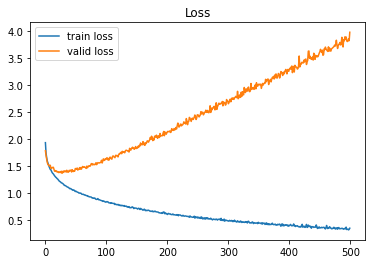

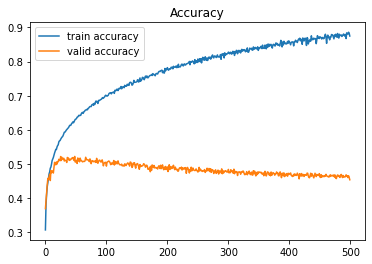

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.2105 - acc: 0.9368 - val_loss: 3.8350 - val_acc: 0.4665
Epoch 2/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1983 - acc: 0.9417 - val_loss: 3.8464 - val_acc: 0.4666
Epoch 3/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1951 - acc: 0.9431 - val_loss: 3.8434 - val_acc: 0.4671
Epoch 4/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1931 - acc: 0.9442 - val_loss: 3.8650 - val_acc: 0.4664
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1923 - acc: 0.9440 - val_loss: 3.8865 - val_acc: 0.4668
Epoch 6/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1906 - acc: 0.9448 - val_loss: 3.8873 - val_acc: 0.4665
Epoch 7/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1897 - acc: 0.9454 - val_loss: 3.9033 - 

50000/50000 [==============================] - 3s 69us/step - loss: 0.1695 - acc: 0.9526 - val_loss: 4.1926 - val_acc: 0.4652
Epoch 60/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1690 - acc: 0.9526 - val_loss: 4.2178 - val_acc: 0.4678
Epoch 61/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1688 - acc: 0.9534 - val_loss: 4.2134 - val_acc: 0.4659
Epoch 62/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1684 - acc: 0.9527 - val_loss: 4.2075 - val_acc: 0.4669
Epoch 63/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1682 - acc: 0.9526 - val_loss: 4.2150 - val_acc: 0.4634
Epoch 64/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1681 - acc: 0.9527 - val_loss: 4.2201 - val_acc: 0.4642
Epoch 65/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1680 - acc: 0.9532 - val_loss: 4.2316 - val_acc: 0.4644
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 3s 68us/step - loss: 0.1569 - acc: 0.9572 - val_loss: 4.4684 - val_acc: 0.4638
Epoch 118/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1569 - acc: 0.9577 - val_loss: 4.4418 - val_acc: 0.4630
Epoch 119/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1568 - acc: 0.9573 - val_loss: 4.4641 - val_acc: 0.4609
Epoch 120/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1564 - acc: 0.9569 - val_loss: 4.4807 - val_acc: 0.4641
Epoch 121/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1562 - acc: 0.9573 - val_loss: 4.4649 - val_acc: 0.4604
Epoch 122/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1560 - acc: 0.9578 - val_loss: 4.4711 - val_acc: 0.4589
Epoch 123/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1562 - acc: 0.9571 - val_loss: 4.4935 - val_acc: 0.4629
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 3s 69us/step - loss: 0.1471 - acc: 0.9612 - val_loss: 4.6995 - val_acc: 0.4628
Epoch 176/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1474 - acc: 0.9606 - val_loss: 4.6957 - val_acc: 0.4603
Epoch 177/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1471 - acc: 0.9609 - val_loss: 4.6896 - val_acc: 0.4594
Epoch 178/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1470 - acc: 0.9610 - val_loss: 4.7117 - val_acc: 0.4600
Epoch 179/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1463 - acc: 0.9611 - val_loss: 4.6882 - val_acc: 0.4617
Epoch 180/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1464 - acc: 0.9604 - val_loss: 4.7349 - val_acc: 0.4623
Epoch 181/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1464 - acc: 0.9608 - val_loss: 4.7318 - val_acc: 0.4614
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 3s 69us/step - loss: 0.1389 - acc: 0.9638 - val_loss: 4.9187 - val_acc: 0.4590
Epoch 234/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1389 - acc: 0.9632 - val_loss: 4.9233 - val_acc: 0.4603
Epoch 235/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1389 - acc: 0.9642 - val_loss: 4.9266 - val_acc: 0.4578
Epoch 236/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1387 - acc: 0.9635 - val_loss: 4.9166 - val_acc: 0.4604
Epoch 237/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1386 - acc: 0.9631 - val_loss: 4.9119 - val_acc: 0.4591
Epoch 238/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1384 - acc: 0.9640 - val_loss: 4.9297 - val_acc: 0.4610
Epoch 239/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1380 - acc: 0.9644 - val_loss: 4.9458 - val_acc: 0.4586 1
Epoch 240/500
50000/50000 [=====

50000/50000 [==============================] - 4s 72us/step - loss: 0.1316 - acc: 0.9666 - val_loss: 5.1219 - val_acc: 0.4570
Epoch 292/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1313 - acc: 0.9666 - val_loss: 5.1183 - val_acc: 0.4568
Epoch 293/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1315 - acc: 0.9667 - val_loss: 5.1282 - val_acc: 0.4561
Epoch 294/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1308 - acc: 0.9664 - val_loss: 5.1199 - val_acc: 0.4570
Epoch 295/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1312 - acc: 0.9665 - val_loss: 5.1354 - val_acc: 0.4589
Epoch 296/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1309 - acc: 0.9665 - val_loss: 5.1352 - val_acc: 0.4577
Epoch 297/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1308 - acc: 0.9664 - val_loss: 5.1278 - val_acc: 0.4598
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.1250 - acc: 0.9683 - val_loss: 5.3141 - val_acc: 0.4554
Epoch 350/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1245 - acc: 0.9687 - val_loss: 5.3016 - val_acc: 0.4585
Epoch 351/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1243 - acc: 0.9689 - val_loss: 5.2987 - val_acc: 0.4565
Epoch 352/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1241 - acc: 0.9693 - val_loss: 5.3210 - val_acc: 0.4569
Epoch 353/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1240 - acc: 0.9690 - val_loss: 5.3237 - val_acc: 0.4590
Epoch 354/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1239 - acc: 0.9694 - val_loss: 5.3351 - val_acc: 0.4567
Epoch 355/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1241 - acc: 0.9688 - val_loss: 5.3263 - val_acc: 0.4558
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.1179 - acc: 0.9717 - val_loss: 5.5068 - val_acc: 0.4527
Epoch 408/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1180 - acc: 0.9708 - val_loss: 5.5179 - val_acc: 0.4548
Epoch 409/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1180 - acc: 0.9710 - val_loss: 5.5201 - val_acc: 0.4537
Epoch 410/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1177 - acc: 0.9710 - val_loss: 5.5167 - val_acc: 0.4545
Epoch 411/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1178 - acc: 0.9709 - val_loss: 5.5268 - val_acc: 0.4552
Epoch 412/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1175 - acc: 0.9715 - val_loss: 5.4967 - val_acc: 0.4566
Epoch 413/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1175 - acc: 0.9712 - val_loss: 5.5083 - val_acc: 0.4540
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 3s 69us/step - loss: 0.1121 - acc: 0.9732 - val_loss: 5.6808 - val_acc: 0.4540
Epoch 466/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1119 - acc: 0.9732 - val_loss: 5.6758 - val_acc: 0.4548
Epoch 467/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1119 - acc: 0.9727 - val_loss: 5.6666 - val_acc: 0.4549
Epoch 468/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1117 - acc: 0.9728 - val_loss: 5.6879 - val_acc: 0.4560
Epoch 469/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.1117 - acc: 0.9733 - val_loss: 5.6952 - val_acc: 0.4558
Epoch 470/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.1113 - acc: 0.9735 - val_loss: 5.7057 - val_acc: 0.4528
Epoch 471/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1114 - acc: 0.9731 - val_loss: 5.6875 - val_acc: 0.4541
Epoch 472/500
50000/50000 [=======

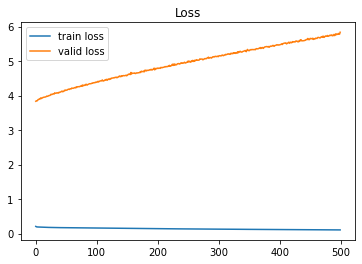

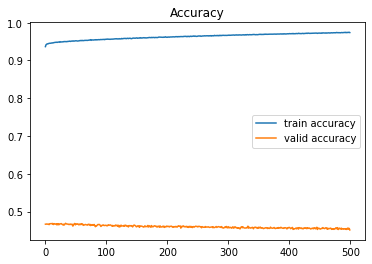

In [10]:

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()